In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyarrow import csv
import boost_histogram as bh
from lmfit.models import *
import matplotlib.pyplot as plt

from nicks_plot_utils import *

import uproot4 as up

center_phi = {
    1: -90,
    2: -30,
    3: +30,
    4: +90,
    5: +150,
    6: -150,
  }



In [2]:
file_name = "/Users/tylern/Data/fid_cuts_pip.csv"
pyTable = csv.read_csv(file_name,read_options=csv.ReadOptions(use_threads=True))
df = pyTable.to_pandas(strings_to_categorical=True)

In [3]:
df.head()

,e_sector,e_p,e_theta,e_phi,pip_sector,pip_p,pip_theta,pip_phi,pip_theta_star,pip_phi_star
0,1,2.529223,0.385549,1.416614,-1,NaN,NaN,NaN,NaN,NaN
1,1,1.059415,0.615729,1.266920,-1,NaN,NaN,NaN,NaN,NaN
2,4,0.624542,0.732910,-1.264343,-1,NaN,NaN,NaN,NaN,NaN
3,3,0.473490,0.746808,-0.234823,-1,NaN,NaN,NaN,NaN,NaN
4,4,2.130505,0.480604,-1.656265,2,1.460415,0.551223,0.752219,1.193524,4.441669


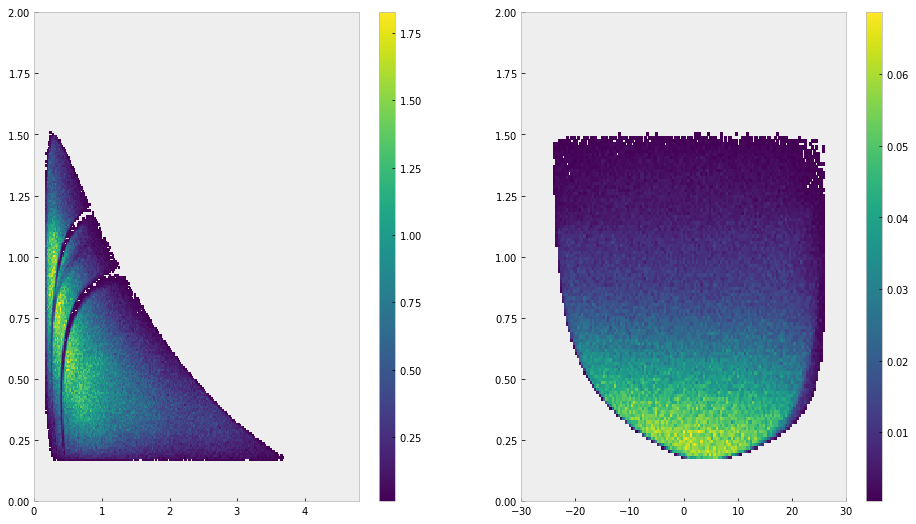

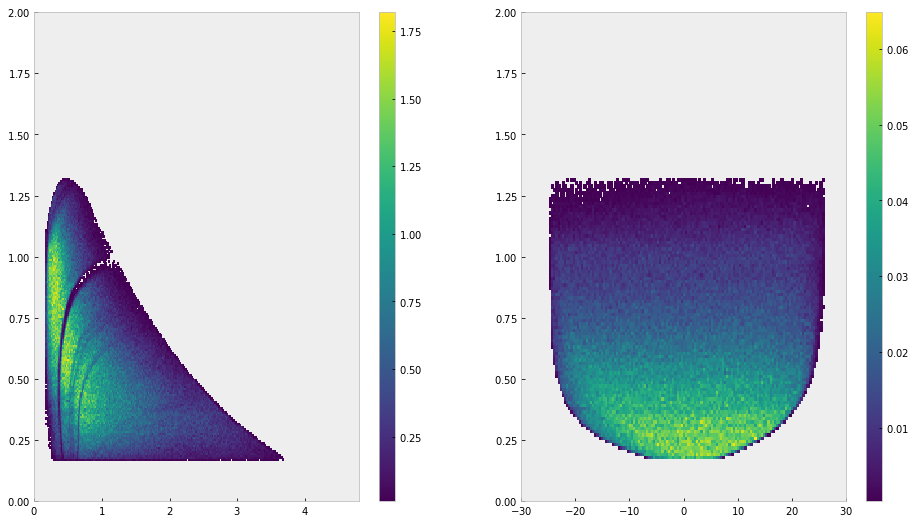

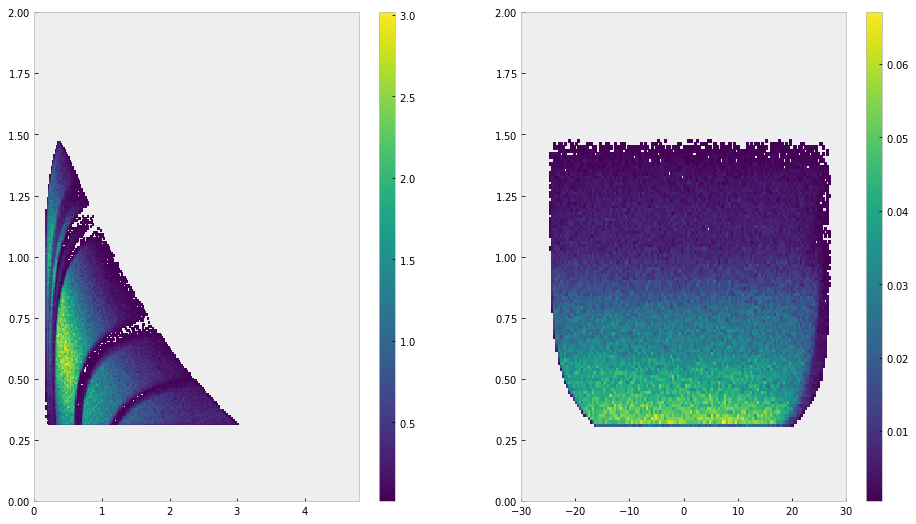

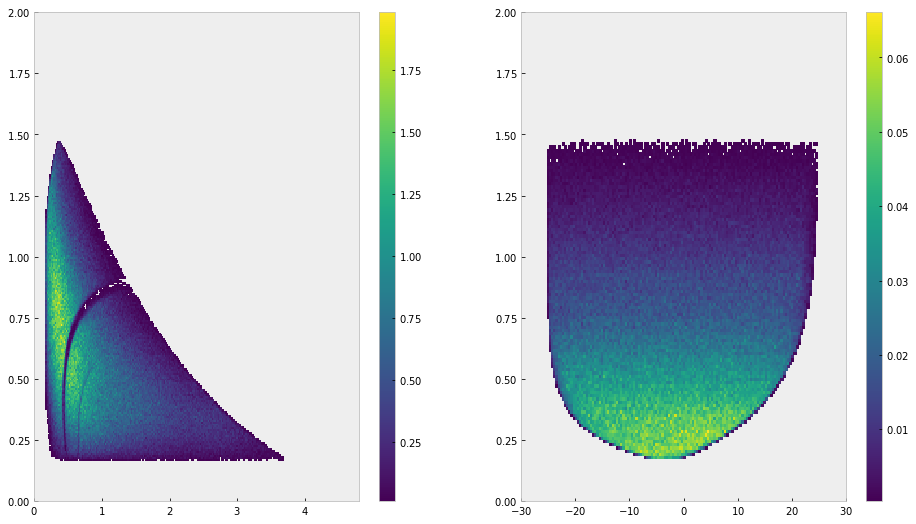

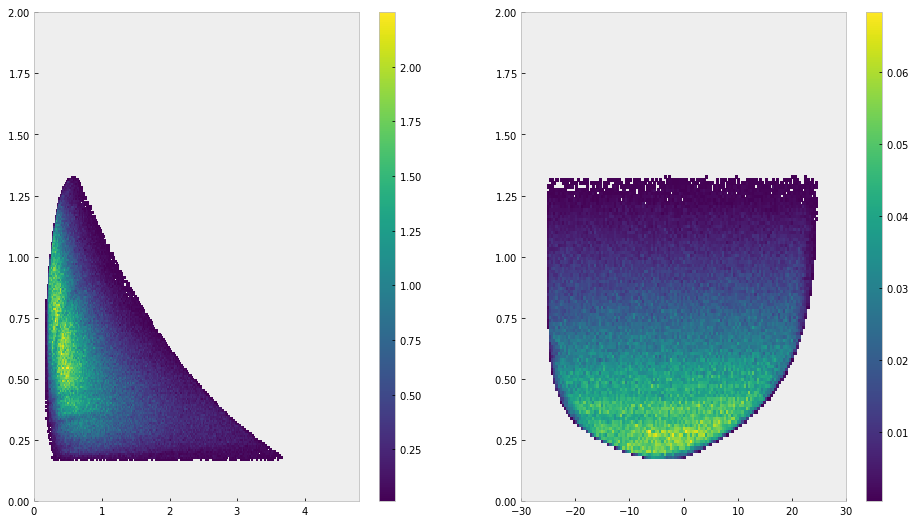

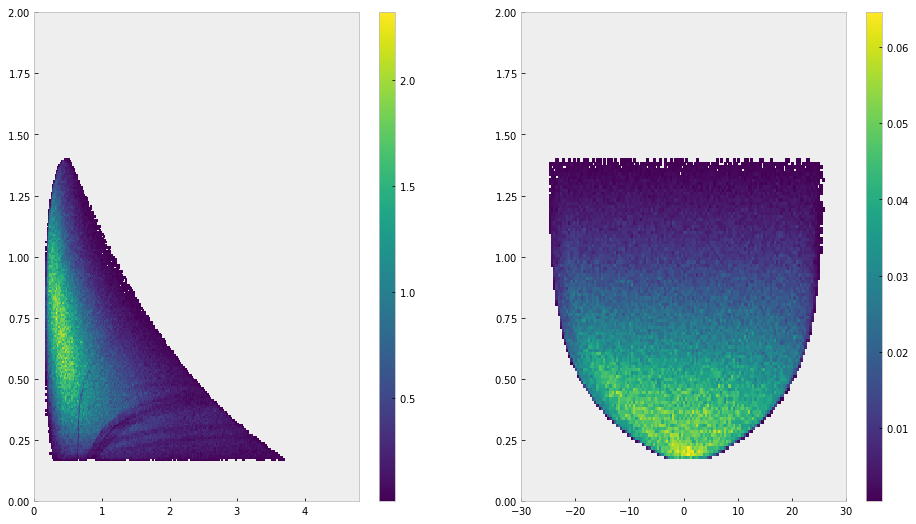

In [4]:
for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
    # _df = df[df.pip_sector == sec]
    _df = df[(df.pip_sector == sec)]
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[0], zeros=False)
    
    epphitheta = Hist2D(xdata=np.rad2deg(_df.pip_phi)+center_phi[sec], ydata=_df.pip_theta, 
                        xbins=150, ybins=150, xrange=[-30,30], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    plt.show()

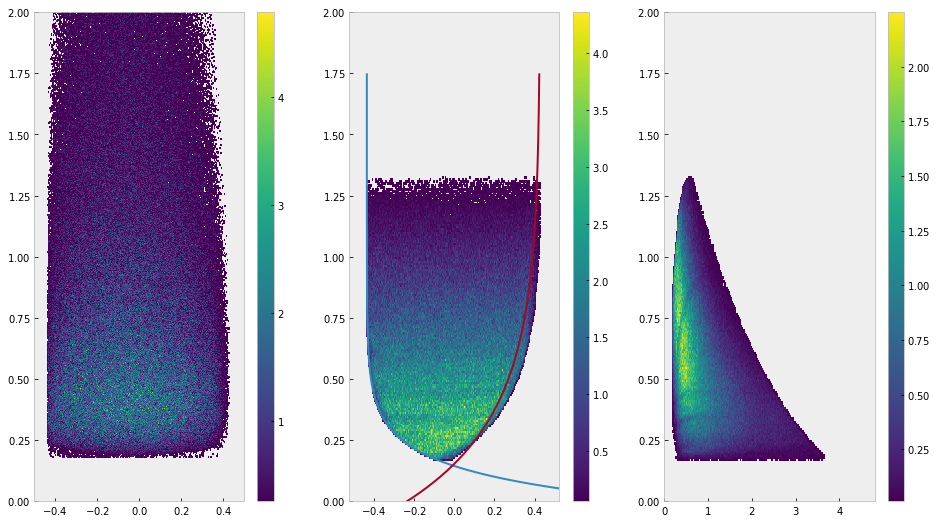

In [5]:

sec = 5

thetas = np.linspace(-30, 100, 200)
phis = np.linspace(0, 1, 200)


a0mh = [25.0, 25.5, 25.5, 26, 26, 26]
a1mh = [0.07, 0.14, 0.11, 0.14, 0.15, 0.07]
a2mh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3mh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

a0xh = [25.0, 25.0, 26.0, 24, 25.5, 25]
a1xh = [0.14, 0.11, 0.13, 0.07, 0.05, 0.07]
a2xh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3xh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

def hadron_fid_phi_m(theta, sec):
    sec = sec - 1
    return (a0xh[sec] * (1.0 - np.exp(-a1xh[sec] * (theta - a2xh[sec]))) - a3xh[sec])

def hadron_fid_phi_x(theta, sec):
    sec = sec - 1
    return -1*(a0mh[sec] * (1.0 - np.exp(-a1mh[sec] * (theta - a2mh[sec]))) - a3mh[sec])



for sec in [5]:
# for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[16,9])
    ax[1].plot(np.deg2rad(hadron_fid_phi_x(thetas, sec)), np.deg2rad(thetas))
    ax[1].plot(np.deg2rad(hadron_fid_phi_m(thetas, sec)), np.deg2rad(thetas))


    _df = df[(df.pip_sector == sec)]
    
    # top_line = 2.0
    # bot_line = 1.35
    
    # ax[1].axhline(bot_line, lw=0.5,c='b')
    # ax[1].axhline(top_line, lw=0.5, c='r')

    # _df = _df[~((_df.pip_theta > bot_line) & (_df.pip_theta < top_line))]
    eptheta = Hist2D(ydata=_df.pip_p, xdata=_df.pip_phi+np.deg2rad(center_phi[sec]), xbins=500, ybins=500, yrange=[0,2.0], xrange=[-0.5,0.5])
    eptheta.plot(ax[0], zeros=False)
    

    
    epphitheta = Hist2D(ydata=_df.pip_theta, xdata=_df.pip_phi+np.deg2rad(center_phi[sec]),
                        xbins=250, ybins=250, xrange=[np.deg2rad(-30),np.deg2rad(30)], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[2], zeros=False)



    ax[1].set_xlim(np.deg2rad(-30), np.deg2rad(30))
    ax[1].set_ylim(0, 2)
    plt.show()

/var/folders/qx/dzb_zjcn11n6z97tjpqfs_1w0000gn/T/xpython_92342/4067208490.py:50: RuntimeWarning: invalid value encountered in power
  s=(np.power(x,0.02)*210-100)*np.exp(-0.5*x)-10


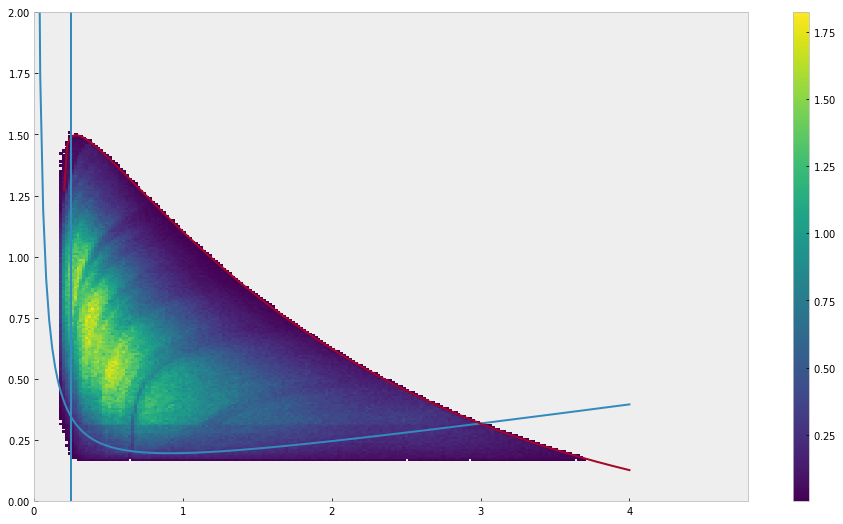

In [6]:

def bot(x, par):
    s=(np.power((x-0.103718),(0.0703664))*252.822-133.024)*np.exp(-0.5*x)+0.1
    
    return np.deg2rad(s)

def top_old(x, par):
    #s=(np.power((x-0.0575818),(0.075643))*238.248-115.039)*np.exp(-0.5*x)-10
    s=(np.power((x-0.0575818),(0.075643))*238.248-115.039)*np.exp(-0.5*x)-10
    return np.deg2rad(s)

def th_s1_down1(x, par):
    x = x + 0.15
    s=(304.23*x*x*x -255.798*x*x+497.462*x +38.0385)*np.exp(-1.85*x) +10
    return np.deg2rad(s)


def th_s1_up1(x, par):
    # s=(304.23*(x+0.15)*(x+0.15)*(x+0.15) -255.798*(x+0.15)*(x+0.15)+497.462*(x+0.15) +38.0385)*np.exp(-1.85*(x+0.15)) +5.5
    x = x + 0.03
    s=(300*x*x*x -300*x*x+500*x -20 )* np.exp(-2.15*x) + 14.3
    return np.deg2rad(s)


def top_old(x, par):
    #s=(np.power((x-0.0575818),(0.075643))*238.248-115.039)*np.exp(-0.5*x)-10
    s=(np.power(x,(0.01))*200-115.039)*np.exp(0.5*x)-10
    return np.deg2rad(s)




sec = 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[16,9])
_df = df #[df.pip_sector == sec]
#_df = df[(df.pip_sector == sec)]
eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
eptheta.plot(ax, zeros=False)

xs = np.linspace(0,4,200)


par = [2.5, 4, 0.001, 4.8]
def thetaMin(x, par):
    np.rad2deg(x)
    ans = par[0] + (par[1]/(x+par[2])) + par[3]*x
    return np.deg2rad(ans)

def top(x, par):
    x = x - 0.2
    s=(np.power(x,0.02)*210-100)*np.exp(-0.5*x)-10
    return np.deg2rad(s)

ax.plot(xs, thetaMin(xs, par))
ax.plot(xs, top(xs, par))

ax.axvline(0.25)
ax.set_ylim(0,2)

plt.show()